# Importing packages and simplfying questions

In [ ]:
#mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from google.colab.data_table import DataTable
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
!pip install prince
from prince import MCA
DataTable.max_columns = 50
warnings.filterwarnings("ignore")
import json
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
from re import match
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from collections import Counter

In [ ]:
#load data
path = 'drive/Shareddrives/SIADS 697 Capstone Gacha/Gacha Survey/'
master_df = pd.read_csv(path+'survey_response_mc.csv')

#add user id and rename columns
master_df = master_df.reset_index().rename(columns = {
    'index': 'user_id',
    'Timestamp': 'timestamp',
    'Have you, at any point in time, played gacha games?': 'user_game_status',
    'How long have you been playing gacha games?': 'user_game_duration',
    'What is your current favorite gacha game?': 'game_title_new',
    'What mobile operating system do you use to play this game?': 'game_os_new',
    'Which version of the game do you play?': 'game_version_new',
    'How did you first hear about/start playing this game?': 'game_intro_new',
    'Estimate how much time you spend on this game per week.': 'game_play_consistency_new',
    "How does this game make you feel when you're playing it?": 'new_feel',
    'What do you like the most about this game? What motivates you to continue playing this game?': 'new_like',
    'What do you like the least about this game? Is there any area you think this game should be improved in?': 'new_dislike',
    'Have you completed any in-app transactions (using real world currency)?': 'game_transaction_new',
    'What is the reason you chose to be Free-to-Play (F2P) for this game?': 'game_f2p_new',
    'Based on your level of spending in this game, What type of paying gamer would you categorize yourself?': 'game_fishchart_new',
    'What would you say is the biggest difference for your in-game experience in comparison to a F2P (free-to-play) player?': 'game_spender_new',
    'TO THE BEST OF YOUR KNOWLEDGE, how much have you spent in total on this gacha game? (in US Dollars)': 'game_spending_new',
    'TO THE BEST OF YOUR KNOWLEDGE, how much do you spend on this gacha game during a month with a high-profile event (anniversary, new years, etc.) (in US Dollars)': 'game_spending_event_new',
    'Name your current favorite gacha game.': 'game_title',
    'What mobile operating system do you use to play this game?.1': 'game_os',
    'Which version of the game do you play?.1': 'game_version',
    'How did you first hear about/start playing this game?.1': 'game_intro',
    'Estimate how much time you spend on this game per week..1': 'game_play_consistency',
    "How does this game make you feel when you're playing it?.1": 'loyal_feel',
    'What do you like the most about this game? What motivates you to continue playing this game?.1': 'loyal_like',
    'What do you like the least about this game? Is there any area you think this game should be improved in?.1': 'loyal_dislike',
    'Have you completed any in-app transactions (using real world currency)?.1': 'game_transaction',
    'What is the reason you chose to be Free-to-Play (F2P) for this game?.1': 'game_f2p',
    'Based on your level of spending in this game, What type of paying gamer would you categorize yourself?.1': 'game_fishchart',
    'What would you say is the biggest difference for your in-game experience in comparison to a F2P (free-to-play) player?.1': 'game_spender',
    'TO THE BEST OF YOUR KNOWLEDGE, how much have you spent on this gacha game in total? (in US Dollars)': 'game_spending',
    'TO THE BEST OF YOUR KNOWLEDGE, how much do you spend on this gacha game during a month with a high-profile event (anniversary, new years, etc.) (in US Dollars).1': 'game_spending_event',
    'Do you have a once-favorite gacha game that you decided to stop playing?': 'user_status_past',
    'What was your once-favorite gacha game that you decided to stop playing?': 'game_title_past',
    'You decided to stop playing this game due to the following factors:': 'game_stop_past',
    'What did you miss the most about your once-favorite gacha game? How did make you feel when you were playing it? ': 'previous_feel',
    'What did you like the least about this game? How did that make you feel?': 'previous_dislike',
    'How long had you been playing this once-favorite gacha game before you stopped?': 'game_duration_past',
    'Have you completed any in-app transactions (using real world currency)?.2': 'game_transaction_past',
    'TO THE BEST OF YOUR KNOWLEDGE, how much have you spent in this game in total? (in US Dollar)': 'game_spending_past',
    'Is there a particular reason why you have not played gacha games?': 'user_notplay',
    'Have you played other types and formats of games?': 'user_notplay_othergame_status',
    'If you answered yes above, list some of the game types you play or have played before.': 'user_notplay_othergame',
    'Have you played other types and formats of games besides gacha?': 'user_othergame_status',
    'If you answered yes above, list some of the game types you play or have played before..1': 'user_othergame',
    'What is your age range?': 'age', 
    'What is your gender?': 'gender',
    'What is your PRIMARY content source (2D culture format)?': 'content',
    'Which continent are you from?': 'continent'}
    )
master_df.columns

Index(['user_id', 'timestamp', 'user_game_status', 'user_game_duration',
       'game_title_new', 'game_os_new', 'game_version_new', 'game_intro_new',
       'game_play_consistency_new', 'new_feel', 'new_like', 'new_dislike',
       'game_transaction_new', 'game_f2p_new', 'game_fishchart_new',
       'game_spender_new', 'game_spending_new', 'game_spending_event_new',
       'game_title', 'game_os', 'game_version', 'game_intro',
       'game_play_consistency', 'loyal_feel', 'loyal_like', 'loyal_dislike',
       'game_transaction', 'game_f2p', 'game_fishchart', 'game_spender',
       'game_spending', 'game_spending_event', 'user_status_past',
       'game_title_past', 'game_stop_past', 'previous_feel',
       'previous_dislike', 'game_duration_past', 'game_transaction_past',
       'game_spending_past', 'user_notplay', 'user_notplay_othergame_status',
       'user_notplay_othergame', 'user_othergame_status', 'user_othergame',
       'age', 'gender', 'content', 'continent'],
      dtype='

# Creating DataFrame Containing all text fields, type of answer, and user id

In [ ]:
emotion_df = master_df[['user_id','new_feel', 'new_like', 'new_dislike','loyal_feel','loyal_like','loyal_dislike','previous_feel','previous_dislike']].copy()

In [ ]:
emotion_df.columns

Index(['user_id', 'new_feel', 'new_like', 'new_dislike', 'loyal_feel',
       'loyal_like', 'loyal_dislike', 'previous_feel', 'previous_dislike'],
      dtype='object')

In [ ]:
users_with_text = []
answer_type = []
answers = []

In [ ]:
for col in emotion_df.columns[1:]:
  users_with_text.extend(emotion_df[col].dropna().index.tolist())
  answer_type.extend([col]*len(emotion_df[col].dropna()))
  answers.extend(emotion_df[col].dropna().tolist())

In [ ]:
all_text_df = pd.DataFrame(columns = ['user_id','answer_type','repo'])

In [ ]:
all_text_df['user_id'] = users_with_text
all_text_df['answer_type'] = answer_type
all_text_df['repo'] = answers

In [ ]:
len(all_text_df)

4866

In [ ]:
all_text_df.sample(20)

,user_id,answer_type,repo
176,70,loyal_feel,Happy
4630,824,previous_dislike,The farming
846,781,loyal_feel,Fun
1552,331,loyal_like,Reading the story and building characters
4430,493,previous_dislike,I SAID I forgot. Probably playing it in the fi...
2675,321,loyal_dislike,Going through stages tends to be repetitive an...
75,31,new_dislike,I dislike that the global server gets reduced ...
4306,246,previous_dislike,"Gameplay, i really get bored with the gameplay"
376,286,loyal_feel,Happy and deppresed
2259,1079,loyal_like,Gameplay isn't RNG


In [ ]:
# Regex for identifying words that don't have numbers.
reg = re.compile(r'[a-zA-Z]+')

#**Word Count Vectorization**

In [ ]:
#initializing the CountVectorizer
wc_vect = CountVectorizer(ngram_range=(1, 2))

#this is the matrix doc we get after applying fit_transform to the text repo. wc stands for word count
wc_df = wc_vect.fit_transform(all_text_df['repo'])

In [ ]:
wc_feature_names = wc_vect.get_feature_names_out()

In [ ]:
#this is the list indices that are words only (no numbers) after filtered by the regex pattern and removed from stopwords
wc_indices = [i for i,val in enumerate(wc_feature_names) if reg.fullmatch(val)]

In [ ]:
wc_indices[0]

212

In [ ]:
len(wc_indices), len(wc_feature_names)

(4651, 33292)

In [ ]:
wc_feature_names[wc_indices], len(wc_feature_names[wc_indices])

(array(['abandon', 'abhorrently', 'abilities', ..., 'zombie', 'zone',
        'zones'], dtype=object), 4651)

In [ ]:
all_words = wc_df[:,wc_indices] # all_words is a matrix that contain only words that qualify the regex match which is words only (no numbers)

In [ ]:
all_words.shape

(4866, 4651)

In [ ]:
with open("drive/Shareddrives/SIADS 697 Capstone Gacha/emotions_dictionary.plk", 'rb') as f:
    emotions_vocab = pickle.load(f)

In [ ]:
#list(emotions_vocab.keys())

In [ ]:
emo_vocab_df = pd.DataFrame(columns=['emo_type','emo_syn','emo_stem'])

In [ ]:
emo_types = []
emo_syns = []
emo_stem = []

In [ ]:
for em in emotions_vocab.keys():
  emo_types.extend([em]*len(emotions_vocab[em]))
  emo_syns.extend(emotions_vocab[em])

In [ ]:
len(emo_types), len(emo_syns)

(862, 862)

In [ ]:
emo_vocab_df

,emo_type,emo_syn,emo_stem


In [ ]:
emo_vocab_df['emo_type'] = emo_types
emo_vocab_df['emo_syn'] = emo_syns

tried both porter stemmer and snowball stemmer, decided to go with snowball stemmer insce porterstemmer trimmed joyous into joyou

In [ ]:
#ps = PorterStemmer()
sb_stemmer = SnowballStemmer("english")

# words to be stemmed: emo_syns
for w in emo_syns:
    emo_stem.append(sb_stemmer.stem(w))

In [ ]:
emo_vocab_df['emo_stem'] = emo_stem

In [ ]:
emo_vocab_df[emo_vocab_df.emo_syn == 'joyous']

,emo_type,emo_syn,emo_stem


In [ ]:
sb_stemmer.stem('joyous')

'joyous'

In [ ]:
#emo_vocab_df['emo_stem'].tolist()

In [ ]:
#lemmatizer = WordNetLemmatizer()

In [ ]:
#this is the list of indices in the text dataset that overlap with the emotions list
emo_indices = [i for i,val in enumerate(wc_feature_names) if val in emo_vocab_df['emo_syn'].tolist() or sb_stemmer.stem(val) in emo_vocab_df['emo_stem'].tolist()]

In [ ]:
len(emo_indices) # 315 words we can recognize emotions

315

In [ ]:
emo_wc = wc_df[:,emo_indices] #looking at the matrix with columns referring to only recognizable emotions (315 of them)

In [ ]:
emo_wc.shape

(4866, 315)

In [ ]:
len(wc_feature_names[emo_indices].tolist())

315

In [ ]:
existing_emo_types = []

In [ ]:
len(wc_feature_names[emo_indices])

315

In [ ]:
for word in wc_feature_names[emo_indices]:
  if word in emo_vocab_df['emo_syn'].tolist():
    existing_emo_types.append(emo_vocab_df[emo_vocab_df['emo_syn'] == word]['emo_type'].tolist()[0]) #some words apply across similar emotion types. Since each smaller list of emotion types are ranked alphabetically, we just go ahead with the first one in the list. example: ['happy','joy']
  elif sb_stemmer.stem(word) in emo_vocab_df['emo_stem'].tolist():
    existing_emo_types.append(emo_vocab_df[emo_vocab_df['emo_stem'] == sb_stemmer.stem(word)]['emo_type'].tolist()[0])

In [ ]:
len(existing_emo_types)

315

In [ ]:
#creating a lookup dataframe for the actual words expressing emotions and their corresponding emotion types
emo_type_lookup_df = pd.DataFrame(zip(existing_emo_types, wc_feature_names[emo_indices].tolist()),columns = ["emotion_type","emotion_word"])
emo_type_lookup_df.head()

,emotion_type,emotion_word
0,admiration,admire
1,affection,affect
2,affection,affected
3,affection,affection
4,affection,affects


In [ ]:
#the following example examines which words are rolled up under the "liking" type of emotion. This type actually has the dominating highest count of appearance in comparison to even the second most frequent emotion.
# It makes sense to remove from the emotion wheel output, because at the end of the day we were asking about how the favorite games made the respondents feel, so the word "like" and its variations should come up a lot of times. 
emo_type_lookup_df[emo_type_lookup_df.emotion_type == 'liking']['emotion_word']

195      like
196     liked
197    likely
198     likes
199    liking
Name: emotion_word, dtype: object

In [ ]:
len(emo_type_lookup_df.groupby('emotion_type').count()) # there are 138 emotion types in total covering all 315 variations of words expressing emotions.

138

In [ ]:
#the following Counter steps were doing the same thing as the grouby above
#d = Counter(existing_emo_types)
#len(Counter(existing_emo_types)) # there are 138 emotion types in total covering all 315 variations of words expressing emotions.
#key = d.keys()

#df = pd.DataFrame(d,index=key)
#sample = df.T.iloc[:,0]
#sample

#sample.index.tolist()
#fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111,polar=True)

#N = len(sample) 

#theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
#bars = ax.bar(theta, sample, width=0.4)

#ax.set_xticks(theta)
#ax.set_xticklabels(sample.index.tolist())
#ax.yaxis.grid(True)
#plt.show()

In [ ]:
#existing_emo_types -- this list will be column 'emoion_type' in the following dataframe

In [ ]:
emo_wc.T.todense().shape # converting the sparce matrix of 4866 rows of word count across 315 emotion words into a dense matrix, transposing the dense matrix so that the rows become emotion words

(315, 4866)

In [ ]:
all_text_df.tail() #again this df is the repository of all text fields

,user_id,answer_type,repo
4861,1221,previous_dislike,Extremely bad rates. Festival units are requir...
4862,1222,previous_dislike,No new content; too repetitive
4863,1223,previous_dislike,Very low rates. Also a friend of mine stopped ...
4864,1226,previous_dislike,"Lack of Auto-Farm (back then), makes gaming re..."
4865,1227,previous_dislike,"The PVP, fighting too many of the same meta teams"


In [ ]:
emo_type_wc_df = pd.DataFrame(emo_wc.T.todense(), columns = list(range(4866))) #converting the dense matrix into a pandas df

In [ ]:
emo_type_wc_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,4856,4857,4858,4859,4860,4861,4862,4863,4864,4865
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
emo_type_wc_df['emotion_type'] = existing_emo_types #attaching column with the corresponding emotion type to the df
#recall that this is a 1:1 reflection of emotion word vs emotion type

In [ ]:
emo_type_wc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4857,4858,4859,4860,4861,4862,4863,4864,4865,emotion_type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,admiration
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affection
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affection
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affection
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affection


In [ ]:
#summing up word counts per unique emotion type with the help of groupby and some reindexing actions
emo_wc_sum_df = emo_type_wc_df.groupby(by=['emotion_type']).sum().reset_index().T.reset_index().iloc[1:,1:]
unique_emotion_types = emo_type_wc_df.groupby(by=['emotion_type']).sum().index.tolist()
emo_wc_sum_df.columns = unique_emotion_types
emo_wc_sum_df = emo_wc_sum_df.reset_index().iloc[:,1:]

In [ ]:
#now we can examine the strength of each emotion type's presence, expressed by each emotion type's total sum of appearences across the entire corpa.
emotion_strength = emo_wc_sum_df.sum()

In [ ]:
#emotion_strength.index.tolist()

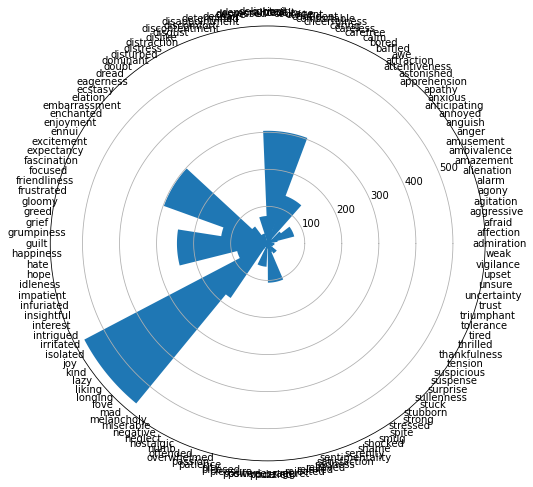

In [ ]:
#visualizing the strengths of all emotions described by wordcount across all text
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)

N = len(emotion_strength) 

theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
bars = ax.bar(theta, emotion_strength, width=0.4)

ax.set_xticks(theta)
ax.set_xticklabels(emotion_strength.index.tolist())
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.show()

#too crowded as the radar chart below shows

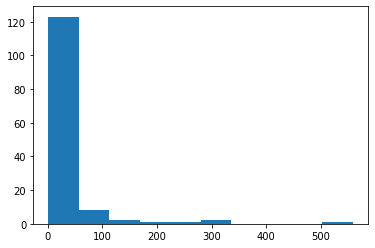

In [ ]:
#taking a quick look at the distribution of emotion type appearences in all text
plt.hist(emotion_strength)
plt.show()

In [ ]:
#worth looking closer at emotions in each appearence frequency tier separately

In [ ]:
#looking at high frequency first with occurences above 50
greater_than_50_df = pd.DataFrame(emotion_strength, columns=['larger'])
greater_than_50_df = greater_than_50_df[(greater_than_50_df.larger >=50) & (greater_than_50_df.larger <greater_than_50_df.larger.max())]
#as mentioned earlier, the "liking category" is the only one above 500 appearances, so this outlier should be removed in order to examine other high frequency emotions

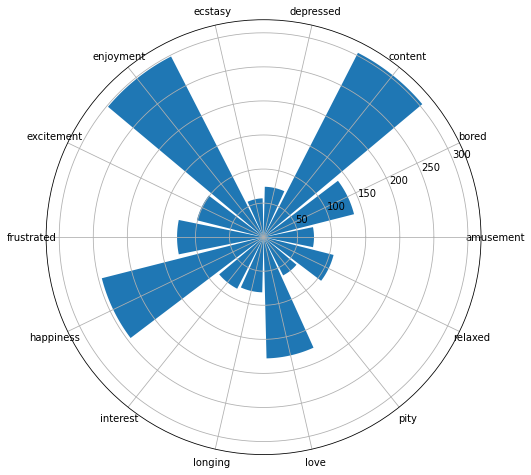

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)

N = len(greater_than_50_df.larger) 

theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
bars = ax.bar(theta, greater_than_50_df.larger, width=0.4)

ax.set_xticks(theta)
ax.set_xticklabels(greater_than_50_df.index.tolist())
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [ ]:
len(greater_than_50_df.larger)#we have 14 kinds of high frequency emotions. these emotions occur most frequently when people are talkinag about their current favorite games or their once favorite games. 
#apparently this is a mix of emotions when they describe what they liked and disliked about those games, so it contains a mix of positive and negative sentiments.

14

In [ ]:
#let's take a look at the words associated with these 14 high frequency emotion types:
for emo_type in greater_than_50_df.larger.index:
  print(emo_type,": ", emo_type_lookup_df[emo_type_lookup_df.emotion_type == emo_type]['emotion_word'].tolist())

amusement :  ['amused', 'amusement', 'amusing', 'entertain', 'entertained', 'entertaining', 'entertainment', 'entertains']
bored :  ['bore', 'bored', 'boring']
content :  ['content', 'contention', 'contents']
depressed :  ['blue', 'depressed', 'depression', 'down', 'downs', 'low']
ecstasy :  ['go', 'going']
enjoyment :  ['enjoy', 'enjoyable', 'enjoyed', 'enjoying', 'enjoyment', 'use', 'used', 'useful', 'usefulness', 'uses', 'using']
excitement :  ['excite', 'excited', 'excitement', 'exciting', 'excitted']
frustrated :  ['defeat', 'disappointed', 'frustrate', 'frustrated', 'frustrates', 'frustrating', 'frustration']
happiness :  ['happiness', 'happy']
interest :  ['interest', 'interested', 'interesting', 'interests']
longing :  ['long']
love :  ['bang', 'eff', 'fucked', 'fucking', 'know', 'knowing', 'knows', 'love', 'loved', 'lovely', 'loves', 'loving']
pity :  ['pity']
relaxed :  ['relax', 'relaxation', 'relaxed', 'relaxing']


the categorization process is not perfect because some verbs like "use" got categorized into enjoyment category, "know" got categorized into loving category, "long" got categorized into longing while

it could just be describing some process being too long. only "long" as a verb should be put into this category.

In [ ]:
#next we look at the mid level frequency emotions from 10-50 occurences

In [ ]:
less_than_50_df = pd.DataFrame(emotion_strength, columns=['smaller'])
less_than_50_df = less_than_50_df[(less_than_50_df.smaller < 50)&(less_than_50_df.smaller >= 10)]

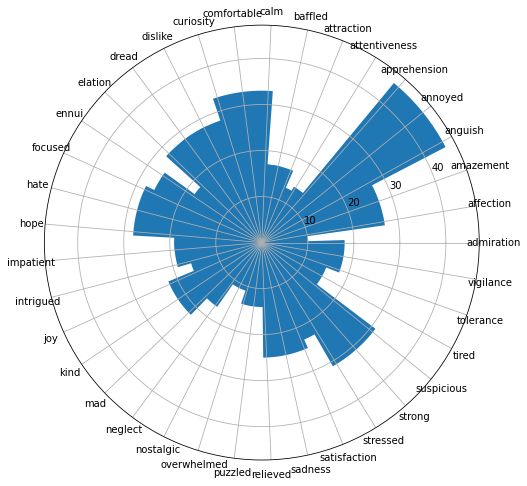

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)

N = len(less_than_50_df.smaller) 

theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
bars = ax.bar(theta, less_than_50_df.smaller, width=0.4)

ax.set_xticks(theta)
ax.set_xticklabels(less_than_50_df.index.tolist())
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [ ]:
len(less_than_50_df) # 37 mid tier occrence emotion types

37

In [ ]:
#let's take a look at the words associated with these mid frequency emotion types which are actually more diverse and interesting to explore:
for emo_type in less_than_50_df.smaller.index:
  print(emo_type,": ", emo_type_lookup_df[emo_type_lookup_df.emotion_type == emo_type]['emotion_word'].tolist())

admiration :  ['admire', 'appreciate', 'appreciated', 'appreciating', 'appreciative']
affection :  ['affect', 'affected', 'affection', 'affects', 'hearted']
amazement :  ['amazing']
anguish :  ['pain', 'painful', 'pains']
annoyed :  ['annoy', 'annoyed', 'annoying']
apprehension :  ['catch', 'catching']
attentiveness :  ['attention']
attraction :  ['attract', 'attractive', 'draw', 'drawing', 'draws']
baffled :  ['baffled', 'confused', 'confusing', 'lost']
calm :  ['calm', 'calming']
comfortable :  ['comfort', 'comfortable', 'comforting', 'easy']
curiosity :  ['rarity']
dislike :  ['dislike', 'disliked', 'dislikes']
dread :  ['awful', 'awfully', 'dread', 'dreadful', 'horrendous', 'horrific', 'terrible']
elation :  ['elated', 'elation', 'light']
ennui :  ['boredom', 'tedium']
focused :  ['focus', 'focused', 'focuses', 'focusing']
hate :  ['hate', 'hated']
hope :  ['hope', 'hopeful', 'hopefully', 'hoping']
impatient :  ['impatience', 'rare', 'rarely']
intrigued :  ['intrigued', 'intriguing

Although these emotions don't appear to be high frequency in the text survey responses, they could be more telling of emotions existing across the larger pool of text data like the app reviews for each game.

In [ ]:
#similarly let's look at the lowest tier of emotions with less than 10 occurences
less_than_10_df = pd.DataFrame(emotion_strength, columns=['least'])
less_than_10_df = less_than_10_df[less_than_10_df.least < 10]

In [ ]:
len(less_than_10_df) # way more than high+mid tiers combined

86

In [ ]:
#let's take a look at what consists the low occurence tiers of emotion types:
for emo_type in less_than_10_df.least.index:
  print(emo_type,": ", emo_type_lookup_df[emo_type_lookup_df.emotion_type == emo_type]['emotion_word'].tolist())

afraid :  ['afraid']
aggressive :  ['aggressive', 'aggressively']
agitation :  ['agitated']
agony :  ['suffer', 'suffered', 'suffering']
alarm :  ['alarms', 'alert']
alienation :  ['aliens']
ambivalence :  ['ambivalent']
anger :  ['anger']
anticipating :  ['anticipated']
anxious :  ['anxious', 'nervous']
apathy :  ['indifferent', 'numbing']
astonished :  ['astounding']
awe :  ['awe']
carefree :  ['carefree']
careless :  ['regardless']
caring :  ['care', 'cared', 'careful']
cheerfulness :  ['cheerful']
confident :  ['confident']
courage :  ['brave']
cruelty :  ['cruel']
delighted :  ['captivated', 'captivating', 'charm', 'delightful']
demoralized :  ['discouraged', 'discouraging']
desire :  ['desire', 'desired']
despair :  ['despair']
determined :  ['compulsion', 'driven']
disappointment :  ['disappointing', 'disappointment']
discomfort :  ['irritating']
discontentment :  ['discontent']
disgust :  ['disgusted', 'disgusting']
distraction :  ['distracted', 'distraction', 'distractions']
d

In [ ]:
emo_wc_sum_df.shape

(4866, 138)

#**TFIDF Vectorization**

In [ ]:
tfidfvectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_df = tfidfvectorizer.fit_transform(all_text_df['repo'])
tfidf_feature_names = tfidfvectorizer.get_feature_names_out()
#this is the list indices that are words only (no numbers) after filtered by the regex pattern and removed from stopwords
tfidf_indices = [i for i,val in enumerate(tfidf_feature_names) if reg.fullmatch(val)]
#this is the list of words from the wc_vect CountVectorizer features after being fit transformed by the text repo
